# Cours 4 - La modelisation

## Vocabulaire

### Une fonction

Une fonction est simplement un outil qui permet d'associer l'extrant aux intrants:

$ intrants -> f(x) -> extrant $ 

Un exemple serait la valeur ($V$) d'un placement selon le temps ($t$) et le rendement ($r$):

$ V_t = V_0(1 + r)^t $


### Type de fonctions

- Lineaire
- Exponentielle
- Polynomiale
- Puissance

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

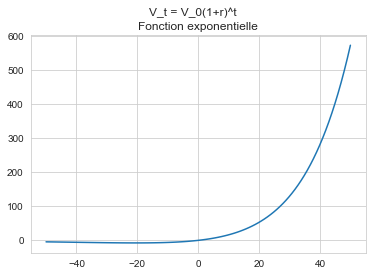

In [118]:
# on genere un espace lineaire
x = np.linspace(-50,50,num=100)

# on creer une liste pour la fonction
fx = []

for i in range(len(x)):
    fx.append(x[i]*(1 + 0.05) ** x[i])

plt.title("Fonction exponentielle")
plt.suptitle("V_t = V_0(1+r)^t")
plt.plot(x,fx)

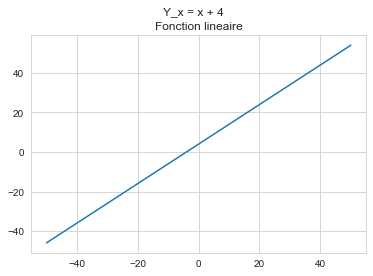

In [119]:
fx = []
for i in range(len(x)):
    fx.append(x[i] + 4)

plt.title("Fonction lineaire")
plt.suptitle("Y_x = x + 4")
plt.plot(x,fx)

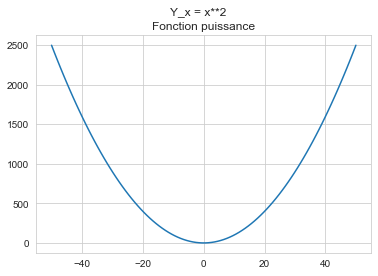

In [120]:
fx = []
for i in range(len(x)):
    fx.append( (x[i]**2))

plt.title("Fonction puissance")
plt.suptitle("Y_x = x**2")
plt.plot(x,fx)

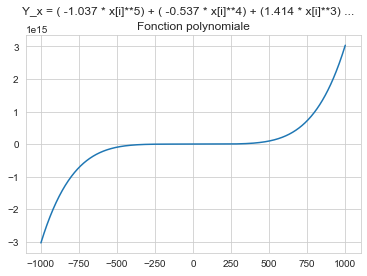

In [121]:
x = np.linspace(-1000,1000,num=1000)

fx = []
for i in range(len(x)):
    fx.append( ( 3.037 * x[i]**5) - ( -0.537 * x[i]**4) + (1.414 * x[i]**3) + (19.777 * x[i]**2 ) + (118.696 * x[i]) - 205.332)

plt.title("Fonction polynomiale")
plt.suptitle("Y_x = ( -1.037 * x[i]**5) + ( -0.537 * x[i]**4) + (1.414 * x[i]**3) ...")
plt.plot(x,fx)

## Buts:

- description
- prediction
- prescription

# Exercises

P.13

In [122]:
lotoquebec = pd.read_excel("donnees\\données_lotto649.xlsx", sheet_name="données")
lotoquebec.head()

,gros lot,nbre billets,gros lot (en millions),nbre de billets (en millions)
0,1782311.9,16028342,1.782312,16.028342
1,1809349.4,15731842,1.809349,15.731842
2,1816727.1,15932143,1.816727,15.932143
3,1853942.1,16338187,1.853942,16.338187
4,1862068.8,14810617,1.862069,14.810617


In [123]:
lotoquebec.describe()

,gros lot,nbre billets,gros lot (en millions),nbre de billets (en millions)
count,2.080000e+02,2.080000e+02,208.000000,208.000000
mean,4.410278e+06,2.050376e+07,4.410278,20.503758
std,3.773723e+06,7.874391e+06,3.773723,7.874391
min,1.782312e+06,1.471269e+07,1.782312,14.712690
25%,2.222078e+06,1.633242e+07,2.222078,16.332418
50%,2.531961e+06,1.814865e+07,2.531961,18.148646
75%,5.198339e+06,2.107002e+07,5.198339,21.070015
max,2.641071e+07,8.166780e+07,26.410706,81.667805


## A) Quelle est la variable dependante (y) et la variable explicative(x)

- y = nbre de billets

- x = gros lot

Nous pouvons 'controler' le gros lot et le montant du gros lot influence le nombre de billets vendus.

## B) Tracez le nuage de points

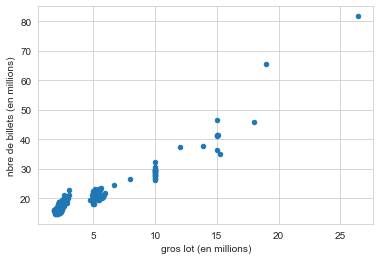

In [124]:
lotoquebec.plot.scatter(x="gros lot (en millions)",y="nbre de billets (en millions)")

## C) Quelle est la meilleure fonction, best fit

Pour repondre a cette question nous allons faire des essais puis nous fier au $R^2$ et a notre interpretation.

Nous allons d'abord selectionne nos Y et X.

In [125]:
import seaborn as sns
import scipy

x = lotoquebec["gros lot (en millions)"]
y = lotoquebec["nbre de billets (en millions)"]

### Lineaire?

0.9014159625182211


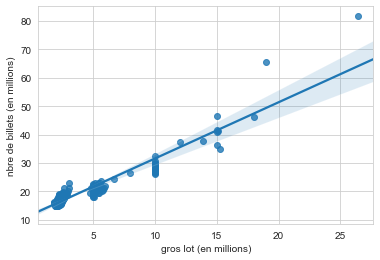

In [126]:
sns.regplot(x=x,y=y)
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(r_value**2)

Que dit Excel?
![monexcel](loto_lineaire_excel.PNG)

### Polynomiale a 3 degres?

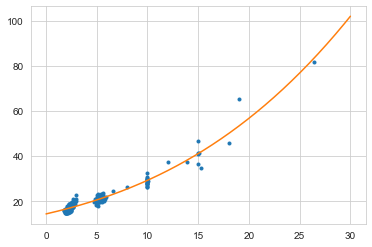

In [127]:
# fit les donnees sur un polynomiale a 3 degre
test1 = np.polyfit(x,y,3)
# genere un espace lineaire qui delimite nos donnees (min,max)
xp = np.linspace(0,30,208)
# change le type d'object python/numpy
z = np.poly1d(test1)

# graphe les points dans le meme espace lineaire et le resultats de polyfit (on superpose)
plt.plot(x,y,'.',xp, z(xp), '-')
plt.show()

In [128]:
import statsmodels.formula.api as smf
f=np.poly1d(test1)
statistics4=smf.ols(formula='y ~ f(x)', data=lotoquebec).fit()
print(statistics4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3977.
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          1.18e-136
Time:                        11:22:17   Log-Likelihood:                -410.74
No. Observations:                 208   AIC:                             825.5
Df Residuals:                     206   BIC:                             832.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.882e-15      0.347   2.56e-14      1.0

Ici nous avons essaye un autre package Python commun: `statsmodels`. Le $R^2$ est de **0.951** (arrondi)

Que dit Excel?
![monexcel2](loto_poly3_excel.PNG)

Je dirais donc fonction polynomiale a 3 degres car elle a le plus grand R2 et la courbe fait du sens.

## D) Interpreter les proprietes de la function dans le contexte du probleme

La fonction est monotone croissante et convexe. C'est donc que plus le gros lot augmente, plus la vente de billet augmente d'une facon acceleree.

# Probleme 2

J'ai du modifie le fichier de donnee an ajoutant une feuille car il n'etait pas propre pour une consommation par Python.

## A) Stats descriptives et min/max/quantiles

In [129]:
encheres = pd.read_excel("donnees\\cas-enchères.xlsx", sheet_name="data")

In [130]:
encheres.describe()

,reponses
count,154.000000
mean,33.015974
std,241.182282
min,0.000000
25%,5.000000
50%,10.000000
75%,19.250000
max,3000.000000


- min : le minimum est de zero
- max : le maximum est de 3000
- quantile : la mediane (q50%) est de 10

la distribution des donnees est fortement biaisees par la presence d'un unique 3000. il est possible que ce soit une erreur d'entree de donnees.

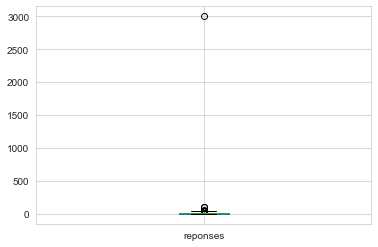

In [213]:
encheres.boxplot()

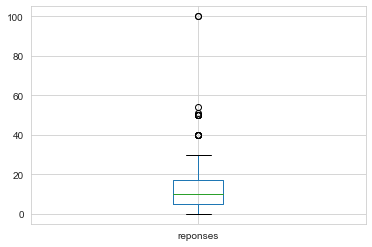

In [214]:
encheres[encheres['reponses'] < 3000].boxplot()

## B) Commenter diff entre moyenne et mediane

- moyenne = 33.02
- mediane = 10




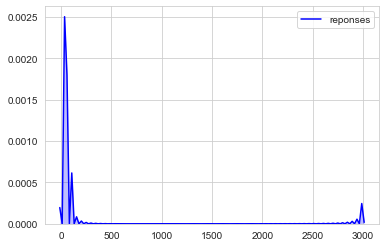

In [131]:
sns.set_style("whitegrid")
sns.kdeplot(encheres['reponses'], color='b', shade=True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDB4A87B08>]],
      dtype=object)

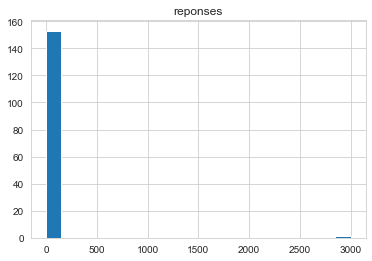

In [132]:
encheres.hist(bins=20)

### Juste une validation si l'on retirait le '3000'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDB4AD3D88>]],
      dtype=object)

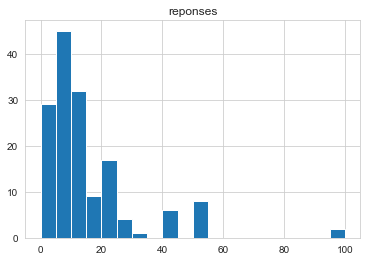

In [133]:
encheres[encheres['reponses'] < 3000].hist(bins=20)

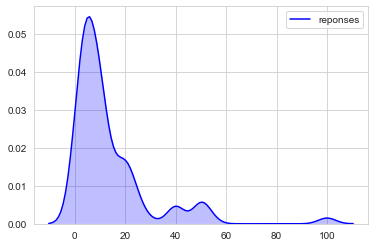

In [134]:
sns.kdeplot(encheres[encheres['reponses'] < 3000].reponses, color='b', shade=True) 

Les deux mesures sont des mesures de tendances centrales. La moyenne est influencee par les valeurs extremes alors que la mediane ne l'est pas. Donc la difference entre les deux est expliquee par la valeur 3000 qui pousse la moyenne vers la droite malgre le fait que 99% des valeurs sont sous la barre des 100.

Il serait plus sage ici d'utiliser la mediane comme mesure de tendance centrale car elle est moins biaisee.

## C) Combien auraient achete si '3' ou '99.99'

Ici on assume qu'une personne prete a payer 5 est aussi prete a payer moins comme 3.

In [135]:
reponse = encheres[encheres['reponses'] >= 3].count()
print("Nombre de personnes qui acheteraient un billet pour 3 dollar: " + str(reponse))

Nombre de personnes qui acheteraient un billet pour 3 dollar: reponses    131
dtype: int64


In [136]:
reponse = encheres[encheres['reponses'] >= 99.99].count()
print("Nombre de personnes qui acheteraient un billet pour 99.99 dollar: " + str(reponse))

Nombre de personnes qui acheteraient un billet pour 99.99 dollar: reponses    3
dtype: int64


## D) Completer le tableau

En gros, pour chaque prix, combien d'acheteurs aurait-on et quelle recettes aurions-nous?

| Prix $p$ | Acheteurs $Q(p)$ | Recette $R$ |
| :------- | :--------------- | :---------- |
| 5| | |
| 15| | |
| 25| | |
| 35| | |

In [177]:
# on creer la table correspondant a la question, puis nous populerons les champs de la question
encheres['reponses'] = encheres['reponses'].astype(int)

data = {"Prix_p":[5,15,25,35]}
df = pd.DataFrame(data)

In [184]:
# convertir les type en integer
df["Prix_p"] = df["Prix_p"].astype(int)
encheres['reponses'] = encheres['reponses'].astype(int)

on compte le nombre de personnes pour chaque prix:

In [197]:
ach_Qp = []
for i in df['Prix_p'].values:
    ach_Qp.append( encheres[ (encheres['reponses'] >= i) ].count()[0] )

df["Acheteurs_Qp"] = ach_Qp
df

,Prix_p,Acheteurs_Qp
0,5,125
1,15,48
2,25,22
3,35,17


on calcule recette

In [198]:
df['Recette_R'] = df['Prix_p'] * df["Acheteurs_Qp"]
df

,Prix_p,Acheteurs_Qp,Recette_R
0,5,125,625
1,15,48,720
2,25,22,550
3,35,17,595


In [212]:
print("Le prix optimal serait : " + str( df[(df['Recette_R'] == df['Recette_R'].max())]['Prix_p'].values[0]) )

Le prix optimal serait : 15


## E) 

## F)

## G)

## H)